# 1. Kütüphaneleri İçeri Aktarmak ve Veriyi Yüklemek

In [ ]:
pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Mnist veri setinin yüklenmesi
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print("Eğitim seti Boyutu:",x_train.shape,y_train.shape)

Eğitim seti Boyutu: (60000, 28, 28) (60000,)


In [7]:
print("Test seti Boyutu:",x_test.shape,y_test.shape)

Test seti Boyutu: (10000, 28, 28) (10000,)


In [9]:
num_labels = len(np.unique(y_train))

# 2. Veriyi Anlamak

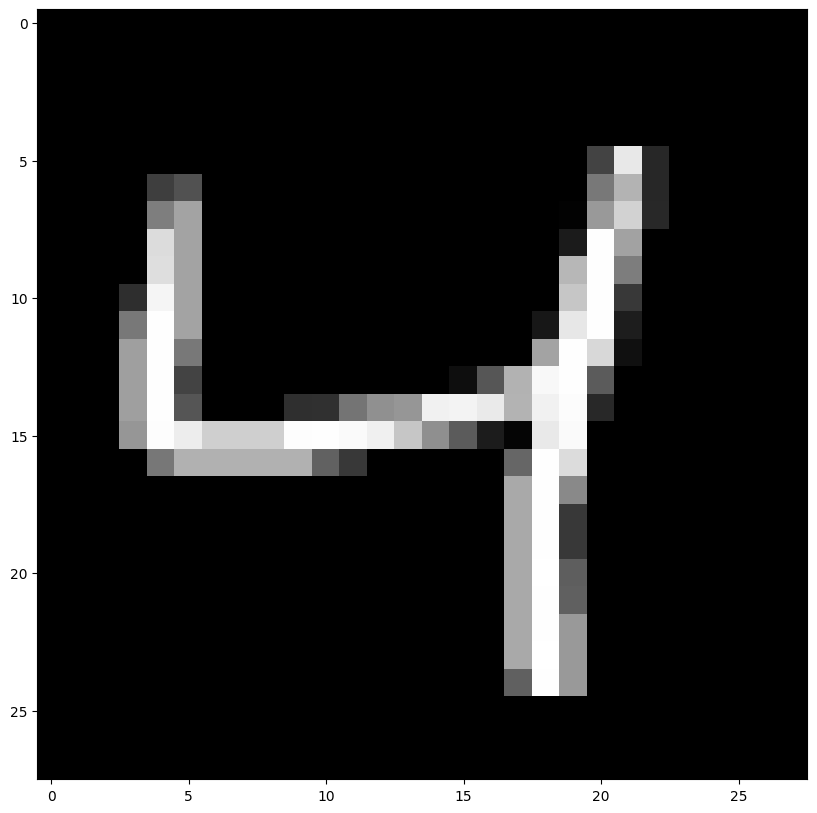

In [23]:
# Veri Setinden Örnekler Gösterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[2],cmap="gray");

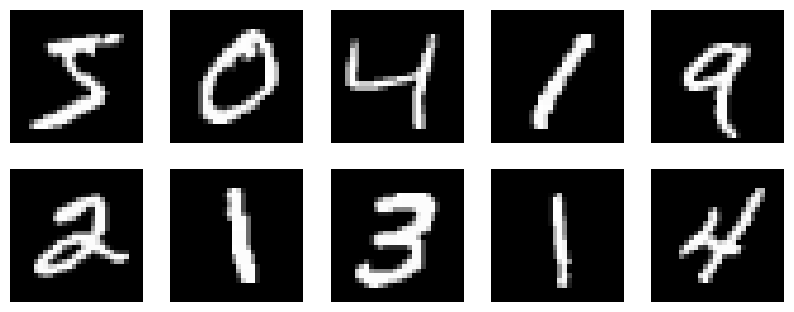

In [15]:
plt.figure(figsize = [10,10])
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n],cmap="gray")
  plt.axis("off")

In [16]:
def visualize_img(data,x):
  plt.figure(figsize = [10,10])
  for n in range(x):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap="gray")
    plt.axis("off")

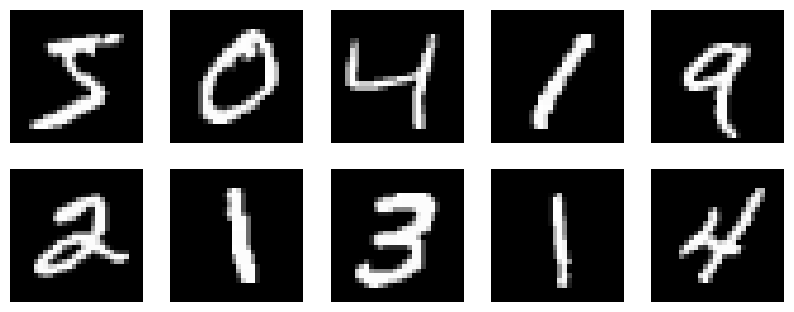

In [19]:
visualize_img(x_train,10)

In [21]:
x_train[2].shape

(28, 28)

In [22]:
x_train[2][10,10]

0

In [25]:
x_train[2][14,10]

49

In [28]:
x_train[2].sum()

19443

In [30]:
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [31]:
x_train[2][14:20,10:20].mean()

96.51666666666667

In [38]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap="gray")
  width,height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y],2)),xy = (y,x),
                  color="white" if img[x][y]<threshold else "black")

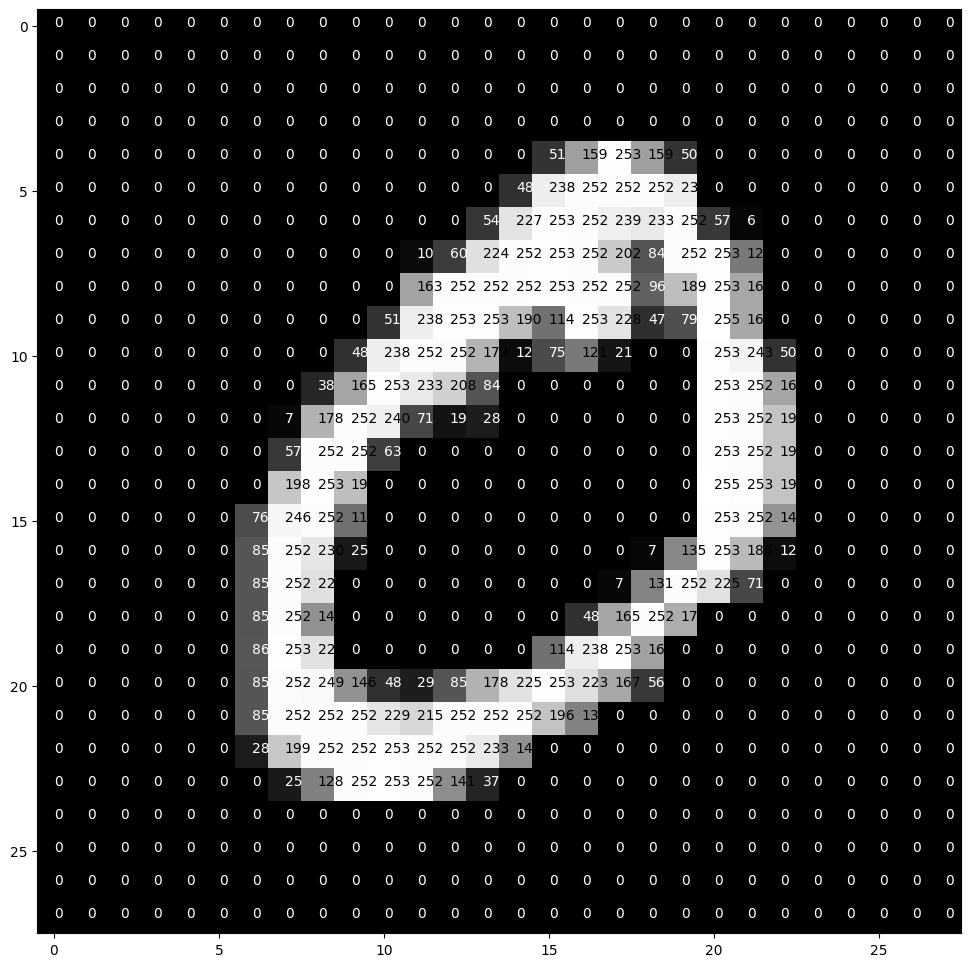

In [39]:
pixel_visualize(x_train[1])

# 3. Veriyi Hazırlamak (Data Preparation)

## Encoding
1.  Önce: [0 1 2 3 4 5 6 7 8 9 ]
2.  Sonra: [0 0 1 0 0 0 0 0 0 0 ]

In [41]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Reshaping

In [44]:
image_size = x_train.shape[1]
image_size

28

In [48]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [49]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


## Standardization

In [50]:
x_train = x_train.astype("float32")/255
x_train = x_train.astype("float32")/255

# 4. Modelleme (Modeling)

## Sinir Ağı Mimarisini Tanımlama


In [52]:
from keras.api._v2.keras import activations

model = tf.keras.Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(units=128, activation="relu", name="layer1"),
    Dense(units=num_labels, activation="softmax", name="output_layer")])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2530 - precision: 0.9451 - recall: 0.9112 - accuracy: 0.9266 - val_loss: 13599.4355 - val_precision: 0.8437 - val_recall: 0.8437 - val_accuracy: 0.8437
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2512 - precision: 0.9450 - recall: 0.9120 - accuracy: 0.9270 - val_loss: 13680.1152 - val_precision: 0.8425 - val_recall: 0.8425 - val_accuracy: 0.8425
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2494 - precision: 0.9455 - recall: 0.9128 - accuracy: 0.9278 - val_loss: 13571.0674 - val_precision: 0.8442 - val_recall: 0.8442 - val_accuracy: 0.8442
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2472 - precision: 0.9459 - recall: 0.9133 - accuracy: 0.9283 - val_loss: 13012.0771 - val_precision: 0.8497 - val_recall: 0.8497 - val_accuracy: 0.8497
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2447 - preci

# 5. Model Başarısı Değerlendirme (Evaluation)

In [57]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2250 - precision: 0.9508 - recall: 0.9214 - accuracy: 0.9351 - val_loss: 11499.4717 - val_precision: 0.8653 - val_recall: 0.8653 - val_accuracy: 0.8653
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2213 - precision: 0.9517 - recall: 0.9235 - accuracy: 0.9360 - val_loss: 11206.2422 - val_precision: 0.8691 - val_recall: 0.8691 - val_accuracy: 0.8691
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2177 - precision: 0.9521 - recall: 0.9244 - accuracy: 0.9371 - val_loss: 11091.8203 - val_precision: 0.8702 - val_recall: 0.8702 - val_accuracy: 0.8702
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2142 - precision: 0.9530 - recall: 0.9255 - accuracy: 0.9386 - val_loss: 10881.1309 - val_precision: 0.8727 - val_recall: 0.8727 - val_accuracy: 0.8727
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2106 - prec

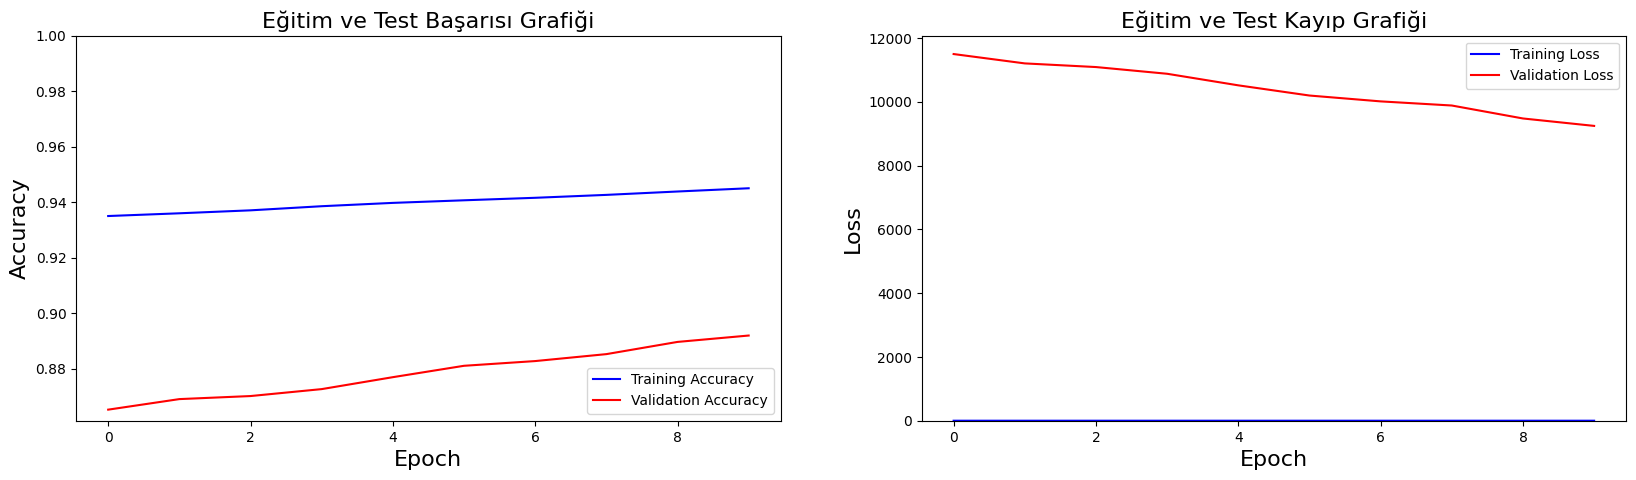

In [78]:
#####################################
# Accuracy ve Loss Grafikleri
#####################################

#--------------------------Grafik 1 Accuracy---------------------------

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color="b",label="Training Accuracy")
plt.plot(history.history["val_accuracy"],color="r",label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Eğitim ve Test Başarısı Grafiği",fontsize=16)

#--------------------------Grafik 2 Loss-------------------------------

plt.subplot(1,2,2)
plt.plot(history.history["loss"],color="b",label="Training Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Eğitim ve Test Kayıp Grafiği",fontsize=16)
plt.show()

In [66]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" %(100.0 * loss))
print("\nTest Precision: %.1f%%" %(100.0 * precision))
print("\nTest Recall: %.1f%%" %(100.0 * recall))


Test Accuracy: 89.2%

Test Loss: 924633.1%

Test Precision: 89.2%

Test Recall: 89.2%


# 6. Tahmin ve Modelin Kaydedilmesi

In [67]:
model.save("mnist_model.h5")

In [68]:
import random
random = random.randint(0,x_test.shape[0])

In [69]:
random

223

In [70]:
test_image = x_test[random]

In [71]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

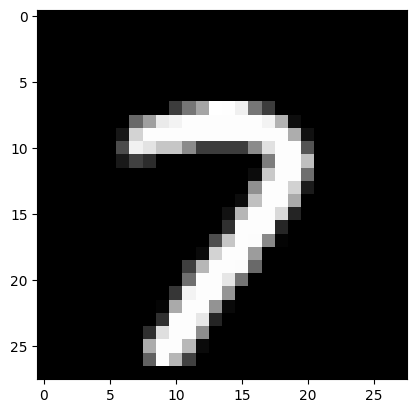

In [72]:
plt.imshow(test_image.reshape(28,28),cmap="gray")

In [73]:
test_data = x_test[random].reshape(1,28,28,1)

In [74]:
probability = model.predict(test_data)
probability

1/1 [==============================] - 0s 117ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [76]:
predict_classes = np.argmax(probability)
predict_classes

7

In [77]:
print(f"Tahmin Edilen Sınıf: {predict_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability,axis=-1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri: \n{probability}")

Tahmin Edilen Sınıf: 7 

Tahmin Edilen Sınıfın Olasılık Değeri: 1.0 

Diğer Sınıfların Olasılık Değerleri: 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
